# (Week2) 🏹 ダーツ問題
```aim.```
+ [確率分布]()を意識的に用いた実装に触れる
+ Pythonのディクショナリ([辞書型]())に触れる

>```e.g.```　確率
>
>📊 ある会社の株価について考えます。
この株価は次の日 $\frac{1}{2}$ の確率で上がるかもしれないし、下がるかもしれません。なぜ $\frac{1}{2}$ なのかというと、株価が変動するという事象は「上がる」もしくは「下がる」の2通りしかない からです。（変わらないという事象を考慮すれば、3通りなので $\frac{1}{3}$ になります。）
>
>🎲 これをサイコロに適用すると、サイコロを振った時に各目の出る確率は $\frac{1}{6}$ になります。（言うまでもないかもしれませんが、サイコロの目は[1,2,3,4,5,6]の6種類だからです。）
>
>株価とサイコロの例では、全ての事象に対して均等に起こりえるので、各事象が同じ確率で起こりえます。数式で表現すると以下のようになります。
>
>$\mathrm{確率} = \frac{1}{\mathrm{起こりえる事象の数}}$
>


+ [確率分布]()
  + [一様分布]()：全ての事象に対して確率が同じ（一様）である分布
  + [離散確率分布]()：データ（事象）が離散的な場合の確率分布（地震や株価）
  + [連続確率分布]()：データ（事象）が連続的な場合の確率分布


```実装するフロー```
1. ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）
2. サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）
3. ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）
4. 1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）
5. 各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）


In [1]:
import numpy as np

In [2]:
np.version.full_version

'1.19.4'

## 【問題1】ダーツのまとを選ぶ
---

In [3]:
def dice():
    number_of_dice = np.random.choice(5)
    return number_of_dice

In [4]:
print('🎲：', dice())

🎲： 1


## 【問題2】ダーツを投げて、刺さった場所を記録する
---

```Cf.```
+ [numpy.random.multivariate_normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html)
+ [Python（NumPy）による正規乱数の生成 - 有意に無意味な話](https://starpentagon.net/analytics/numpy_norm_rand/)
+ [Pythonで多変量正規分布に従う乱数を生成する - 分析ノート](https://analytics-note.xyz/programming/python-multivariate-normal-rvs/)

In [5]:
res = dice()
mean = [res, 0]
cov = [[0.01,0],[0,0.01]]
x, y = np.random.multivariate_normal(mean, cov)
coordinate_point = [x, y]
print(coordinate_point)

[3.866068306579507, -0.01183444692160171]


## 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
---
```Cf.```
+ [4. 組み込み型 dict.update() — Python 3.6.5 ドキュメント](https://docs.python.org/ja/3/library/stdtypes.html#dict.update)
+ [Pythonで辞書に要素を追加、辞書同士を連結（結合） - note.nkmk.me](https://note.nkmk.me/python-dict-add-update/)
> ```update()```メソッドは辞書型の```.append()```メソッド的な ※追加更新で上書きされてしまう

In [94]:
iteration = 1000
coordinate_list = []
for i in range(iteration):
    res = dice()
    mean = [res, 0]
    cov = [[0.01,0],[0,0.01]]
    x, y = np.random.multivariate_normal(mean, cov)
    coordinate_point = [x, y]
    coordinate_list.append(dict(zip(['Throw', 'Target', 'Coordinate'],[i, res, coordinate_point])))


x = np.array(coordinate_list)
print(type(x), x.shape, '\n', x)

<class 'numpy.ndarray'> (1000,) 
 [{'Throw': 0, 'Target': 3, 'Coordinate': [3.0454414771390654, 0.06269559628527967]}
 {'Throw': 1, 'Target': 2, 'Coordinate': [2.020087411794088, -0.04677268764102943]}
 {'Throw': 2, 'Target': 2, 'Coordinate': [2.0784409446630217, 0.0007928594232905284]}
 {'Throw': 3, 'Target': 2, 'Coordinate': [2.0286092960445785, -0.008981270960882895]}
 {'Throw': 4, 'Target': 2, 'Coordinate': [2.000678818702587, 0.18464937858427863]}
 {'Throw': 5, 'Target': 0, 'Coordinate': [0.06476798003218612, -0.07976743480433614]}
 {'Throw': 6, 'Target': 1, 'Coordinate': [0.9874764824148053, 0.049451768657761914]}
 {'Throw': 7, 'Target': 0, 'Coordinate': [-0.0641239157560624, 0.09483194378491339]}
 {'Throw': 8, 'Target': 4, 'Coordinate': [4.080255903349932, -0.0030637983345017496]}
 {'Throw': 9, 'Target': 4, 'Coordinate': [3.936625732587422, 0.022818655365434842]}
 {'Throw': 10, 'Target': 1, 'Coordinate': [0.9205249285257214, 0.01971857978798618]}
 {'Throw': 11, 'Target': 4, 'Coo

## 【問題4】ダーツのまとと刺さった位置を描画する
---
```Cf.```
+ [Mmh Donuts!!! — Matplotlib 3.1.1 documentation](https://matplotlib.org/gallery/shapes_and_collections/donut.html)
+ [matplotlib.patches.Circle — Matplotlib 3.1.1 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Circle.html#matplotlib.patches.Circle)
+ [辞書のキーで作製したNumPy配列を辞書の値に変更したい - teratail](https://teratail.com/questions/143402)
+ [ひと目でわかるmatplotlib直下クラスの概要一覧と、53個の図形サンプルソース - Quiita](https://qiita.com/kannoma/items/b24c7529174ea81a4cfb#patches)
+ [Matplotlib で円をプロットする方法 - delftstack](https://www.delftstack.com/ja/howto/matplotlib/how-to-plot-a-circle-in-matplotlib/)

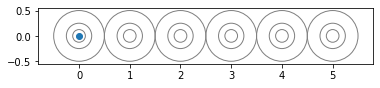

In [142]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

# 的
target = 6
for i in range(target):
    for j in range(1, 4):
        circle = plt.Circle((i, 0), radius=(1/(2**j)), edgecolor='gray', fill=False)
        plt.gca().add_patch(circle)

    # 座標
    iteration = 1000
    coordinate_list = []
    for i in range(iteration):
        res = dice()
        mean = [res, 0]
        cov = [[0.01,0],[0,0.01]]
        x, y = np.random.multivariate_normal(mean, cov)
        coordinate_point = [x, y]
        coordinate_list.append(dict(zip(['Throw', 'Target', 'Coordinate'],[i, res, coordinate_point])))

        plt.scatter(0,0)


plt.axis('scaled')
plt.show()

---

```note```

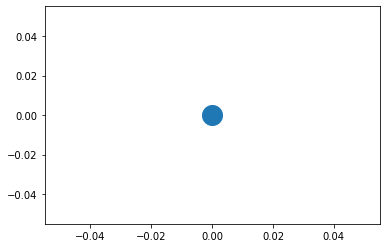

In [90]:
#ポイントの散布図
import matplotlib.pyplot as plt
plt.scatter(0, 0, s=400) #円面積（半径指定）
plt.show()

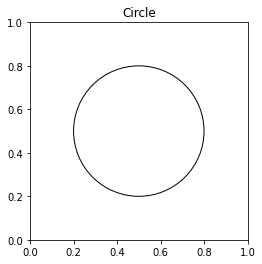

In [37]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
draw_circle = plt.Circle((0.5, 0.5), 0.3,fill=False)

axes.set_aspect(1)
axes.add_artist(draw_circle)
plt.title('Circle')
plt.show()

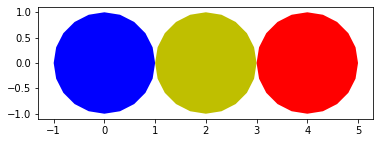

In [73]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

circle1 = mpatches.CirclePolygon((0, 0), radius = 1, fc = 'b')
circle2 = mpatches.CirclePolygon((2, 0), radius = 1, fc = 'y')
circle3 = mpatches.CirclePolygon((4, 0), radius = 1, fc = 'r')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)
plt.axis('scaled')
plt.show()

## 【問題5】関数化
---


## 【発展】ダーツシミュレーションの数理的な話
---

```Cf.```
+ [VAEとGANを生成画像で比較する - マサムネの部屋](https://masamunetogetoge.com/vaevsgan#toc1)
+ []()



**確率的生成モデル**
+ 出る目の分布が一様分布に従うサイコロ
> $p(d=1)=\frac{1}{6}, \cdots, p(d=6)=\frac{1}{6}$
+ ダーツが刺さる場所は、x座標もy座標も正規分布に従うと仮定
>$p(x|d) = p(x|\mu(d)) = N(x|\mu(d), \sigma^{2})$

確率密度分布:上記２式を掛け算（混合正規分布）
>$p(x) = \sum_{d=1}^{6} p(d)p(x|d) = \sum_{d=1}^{6} \frac{1}{6} N(x|\mu(d), \sigma^{2})$


